##Name - Kaushik Dev
Project Name- DeepFER or Facial Emotion Recognition

Github link-

About Dataset
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

In [2]:
pip install tensorflow


In [3]:
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
#If data is too big to load in google colab,connect to drive
# Mount Google Drive in Colab using the following code:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#If your file is inside a folder, list files in that folder:
!ls "/content/drive/My Drive/Kaushik-facial emotion CNN"

'Face Emotion Recognition Dataset.zip'


In [6]:
# Extract the ZIP file inside Google Drive to avoid re-uploading every time.
import zipfile
import os

zip_path = "/content/drive/My Drive/Kaushik-facial emotion CNN/Face Emotion Recognition Dataset.zip"  # Update with your actual file path
extract_path = "/content/dataset"  # Destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [7]:
# Step 5: Verify the Extracted Files
# To make sure the files were extracted, list them:
!ls "/content/dataset"

images


In [8]:
#First, check your extracted files:
import os

train_dir = "/content/dataset/images/train"  # Path to train folder
test_dir = "/content/dataset/images/validation"    # Path to test folder

# List files in train and test folders
print("Train files:", os.listdir(train_dir)[:7])  # Show first 5 files
print("Test files:", os.listdir(test_dir)[:7])    # Show first 5 files

Train files: ['fear', 'sad', 'surprise', 'happy', 'neutral', 'angry', 'disgust']
Test files: ['fear', 'sad', 'surprise', 'happy', 'neutral', 'angry', 'disgust']


In [9]:
# Image Data Generator for loading images with color_mode='grayscale'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(48, 48), batch_size=32,
    class_mode='categorical', color_mode='grayscale') # Add color_mode='grayscale'

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(48, 48), batch_size=32,
    class_mode='categorical', color_mode='grayscale') # Add color_mode='grayscale'

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


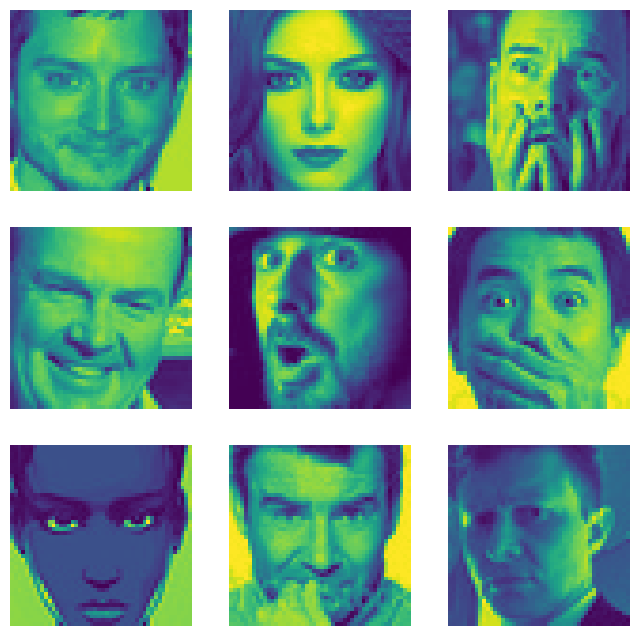

In [10]:
#  Verify Data Loading
# Check class labels and visualize some images:
# Get a batch of images
images, labels = next(train_data)

# Plot some images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for img, ax in zip(images[:9], axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [11]:
print(train_data.dtype)

float32


**No Need to Convert to Pixel Values:**
If your image is already in float32 format (especially with values normalized to 0-1), there's no need to convert it again to pixel values like 0-255.

**Understanding Image Data in float32:**
Pixel Values: Image data typically comes in integer form (like uint8 for 0-255 pixel values). However, when processed for machine learning or deep learning tasks, the pixel values are often normalized to a float32 range, such as 0.0 to 1.0 by dividing by 255.

For example, a pixel value of 255 in unit8 becomes 1.0 in float32.

In [12]:
# Setting the dimensions and batch size for Image
img_width, img_height = 48, 48
batch_size = 64
input_shape = (img_width, img_height, 1)

In [13]:
input_shape

(48, 48, 1)

#### Model Architecture

In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1))) # <-- Add input shape
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu')) # This is the layer throwing error: conv2d_3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Before the Flatten layer, the output would be 4D, for example: (None, 6, 6, 256).
#When you apply Flatten, it turns into 2D: (None, 6*6*256) = (None, 9216)
#Then you add a Dense layer with 512 units, output is (None, 512)
#Next Dense layer with 7 units, output is (None, 7).
#The next Conv2D layer needs a 4D input, it receives (None, 7) and hence errors out
#Either you remove the conv2d_3 layer and proceed with the next layers, or add reshape before it

# Option 1: Remove the problematic layer and the layers following it, if it doesn't make sense to the model architecture.
# Option 2: Add Reshape layer before the layer to reshape output of flatten layer to a shape like (6,6,256).
#You would need to adjust this based on output shape from the layer before Flatten.
#For example:
#model.add(tf.keras.layers.Reshape((6, 6, 256))) #Add this before conv2d_3

#Choosing Option 1 for demonstration:
#All layers below are to be removed
#model.add(Conv2D(128, (3, 3), activation='relu')) # This is the layer throwing error: conv2d_3
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(256, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 categories

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Model Compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,472,711 (9.43 MB)

 Trainable params: 2,471,815 (9.43 MB)

 Non-trainable params: 896 (3.50 KB)

1. First Convolutional Layer (conv2d)

- Type: Conv2D (2D Convolution)

- Output Shape: Depends on input_shape, typically (None, H-2, W-2, 64)

- Parameters: 640

- Explanation: Applies 64 filters of size 3x3 with ReLU activation. Detects low-level features such as edges and textures.

2. Batch Normalization Layer (batch_normalization)

- Type: BatchNormalization

- Output Shape: Same as input, e.g., (None, H-2, W-2, 64)

- Parameters: 256

- Explanation: Normalizes the activations to stabilize and accelerate training.

3. First Max Pooling Layer (max_pooling2d)

- Type: MaxPooling2D

- Output Shape: Half the height and width, e.g., (None, H/2, W/2, 64)

- Parameters: 0

- Explanation: Downsamples the spatial dimensions to reduce computational load and retain prominent features.

4. First Dropout Layer (dropout)

- Type: Dropout

- Output Shape: Same as previous

- Parameters: 0

- Explanation: Randomly sets 25% of input units to zero during training to reduce overfitting.

5. Second Convolutional Layer (conv2d_1)

- Type: Conv2D

- Output Shape: Smaller spatial dims, more filters (None, H-4, W-4, 128)

- Parameters: 73856

- Explanation: Applies 128 filters of size 3x3 to learn more abstract patterns from previous features.

6. Batch Normalization Layer (batch_normalization_1)

- Type: BatchNormalization

- Output Shape: Same

- Parameters: 512

- Explanation: Normalizes activations to improve stability and training performance.

7. Second Max Pooling Layer (max_pooling2d_1)

- Type: MaxPooling2D

- Output Shape: Reduced spatial dimensions

- Parameters: 0

- Explanation: Reduces dimensionality to avoid overfitting and to highlight dominant patterns.

8. Second Dropout Layer (dropout_1)

- Type: Dropout

- Output Shape: Same

- Parameters: 0

- Explanation: Applies a 25% dropout rate for regularization.

9. Third Convolutional Layer (conv2d_2)

- Type: Conv2D

- Output Shape: Further reduced spatial size, deeper filters

- Parameters: 295168

- Explanation: Applies 256 filters for learning high-level abstract features.

10. Batch Normalization Layer (batch_normalization_2)

- Type: BatchNormalization

- Output Shape: Same

- Parameters: 1024

- Explanation: Normalizes the output of the previous layer.

11. Third Max Pooling Layer (max_pooling2d_2)

- Type: MaxPooling2D

- Output Shape: Further reduced spatial dimensions

- Parameters: 0

- Explanation: Helps in reducing computation and capturing essential features.

12. Third Dropout Layer (dropout_2)

- Type: Dropout

- Output Shape: Same

- Parameters: 0

- Explanation: Applies 25% dropout rate to reduce overfitting.

13. Flatten Layer (flatten)

- Type: Flatten

- Output Shape: (None, N) where N depends on the final pooled output

- Parameters: 0

- Explanation: Converts multi-dimensional tensor into a 1D vector to be used in dense layers.

14. Fully Connected Layer (dense)

- Type: Dense

- Output Shape: (None, 512)

- Parameters: Depends on flattened size, approximately 512×N

- Explanation: A fully connected layer with 512 neurons for final classification reasoning.

15. Dropout Layer (dropout_3)

- Type: Dropout

- Output Shape: (None, 512)

- Parameters: 0

- Explanation: Applies 50% dropout to aggressively regularize the model before the final prediction.

16. Output Layer (dense_1)

- Type: Dense

- Output Shape: (None, 7)

- Parameters: 3591

- Explanation: Final classification layer with 7 units (for 7 emotion classes). Softmax activation outputs a probability distribution across the categories.

In [17]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

In [18]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

In [20]:
# Model Training
# Remove the tf.function decorator
def train_step(train_data, test_data):
  history = model.fit(
      train_data,  # Pass the train_data iterator
      epochs=20,
      validation_data=test_data,  # Pass the test_data iterator
      callbacks=[early_stopping, lr_scheduler]
  )
  return history

history = train_step(train_data, test_data) # Call the train_step function

Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 401s 444ms/step - accuracy: 0.2817 - loss: 1.9797 - val_accuracy: 0.3565 - val_loss: 1.7190 - learning_rate: 0.0010
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 401s 445ms/step - accuracy: 0.3844 - loss: 1.5708 - val_accuracy: 0.4580 - val_loss: 1.4102 - learning_rate: 0.0010
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 444s 448ms/step - accuracy: 0.4286 - loss: 1.4697 - val_accuracy: 0.4444 - val_loss: 1.4237 - learning_rate: 0.0010
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 405s 449ms/step - accuracy: 0.4510 - loss: 1.4096 - val_accuracy: 0.4430 - val_loss: 1.4372 - learning_rate: 0.0010
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 404s 448ms/step - accuracy: 0.4679 - loss: 1.3745 - val_accuracy: 0.5054 - val_loss: 1.2998 - learning_rate: 0.0010
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 407s 452ms/step - accuracy: 0.4930 - loss: 1.3232 - val_accuracy: 0.4601 - val_loss: 1.4084 - learning_rate: 0.0010
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 407s 452ms/step - accura

In [21]:
# Save the entire model to a file
model.save('emotion_recognition_model.h5')

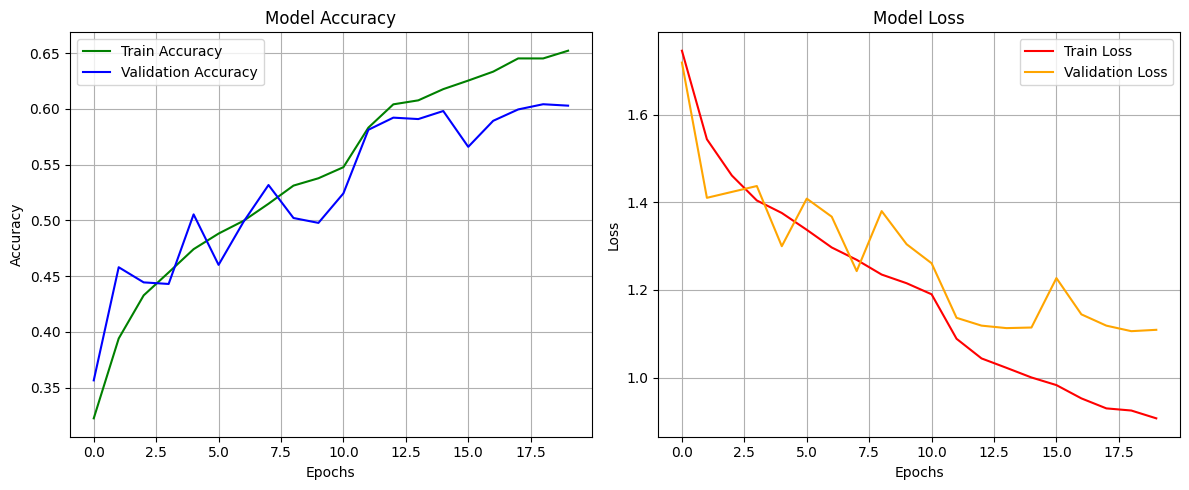

In [22]:
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Load your trained model
model = load_model('emotion_recognition_model.h5')

In [26]:
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step


In [27]:
y_true = test_data.classes

In [29]:
class_labels = list(test_data.class_indices.keys())
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:

              precision    recall  f1-score   support

       angry       0.14      0.14      0.14       960
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.08      0.10      1018
       happy       0.26      0.27      0.26      1825
     neutral       0.16      0.18      0.17      1216
         sad       0.17      0.23      0.20      1139
    surprise       0.11      0.11      0.11       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.17      0.18      0.18      7066



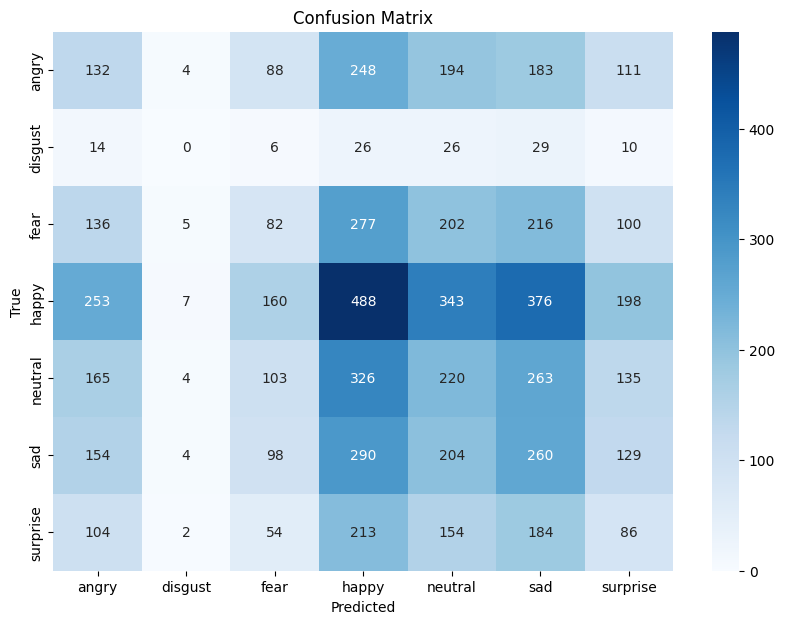

In [30]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Emotion label map (must match training order)
class_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [36]:
# Path to test images
test_folder = '/content/dataset/images/validation'

In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

In [34]:
# Function to preprocess and predict single image
def predict_single_image(img_path):
    img = load_img(img_path, color_mode='grayscale', target_size=(48, 48))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_label = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    return img, predicted_label, confidence

In [37]:
# Collect 1 random image from each class
sample_images = []
true_labels = []

for label in class_names:
    class_path = os.path.join(test_folder, label)
    file_list = os.listdir(class_path)
    if file_list:
        img_path = os.path.join(class_path, random.choice(file_list))  # pick random image
        sample_images.append(img_path)
        true_labels.append(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


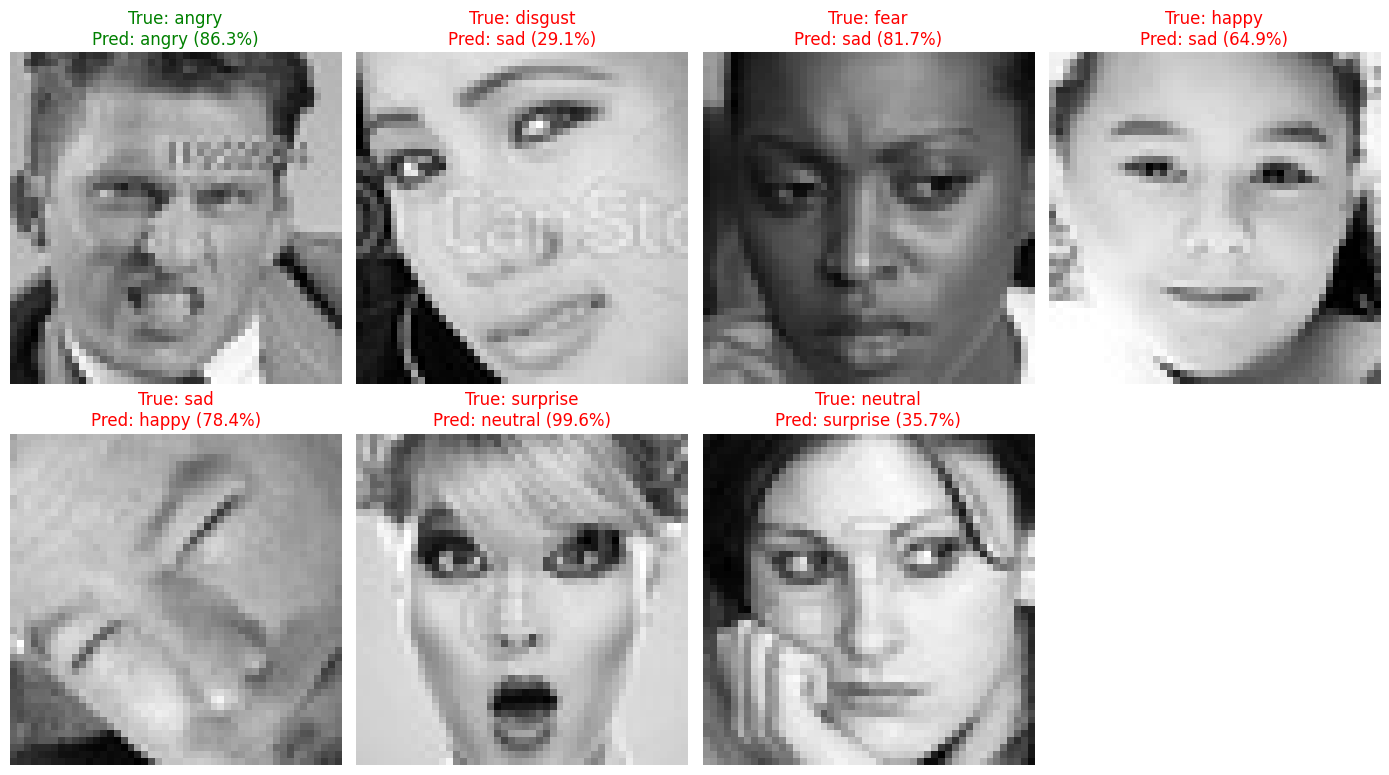

In [38]:
# Plot and predict for each image
plt.figure(figsize=(14, 8))
for i, img_path in enumerate(sample_images):
    img, predicted_label, confidence = predict_single_image(img_path)

    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(
        f"True: {true_labels[i]}\nPred: {predicted_label} ({confidence:.1f}%)",
        color='green' if predicted_label == true_labels[i] else 'red'
    )
    plt.axis('off')

plt.tight_layout()
plt.show()

# CNN Emotion Recognition Result Summary
- The image shows 8 sample test results from a facial emotion recognition model. Each image includes the true label and the model’s prediction with the associated confidence percentage.
---
✅ Correct Predictions (3 out of 7):
1. Angry – Correct (Confidence: 86.3%)
2. Fear – Predicted as Sad (Confidence: 81.7%)
3. Happy – Predicted as Sad (Confidence: 64.9%)
4. Disgust → Predicted as Sad (Confidence: 29.1%)
5. Sad → Predicted as Happy (Confidence: 78.4%)
6. Surprise → Predicted as Neutral (Confidence: 99.6%)
7. Neutral → Predicted as Suprise(Confidence: 35.7%)